# Lab 6 - Model comparison

Justyna Gibas 403122

In [105]:
from cmdstanpy import CmdStanModel
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  
import arviz as az

N = (len("Justyna")+len("Gibas"))*100

Generate data

In [106]:
model_1=CmdStanModel(stan_file='code_1.stan')
data=dict(N=N)
sim_1=model_1.sample(data=data,
                    iter_sampling=1,
                    fixed_param=True, 
                    iter_warmup=0, 
                    chains=1, 
                    seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [107]:
model_2=CmdStanModel(stan_file='code_2.stan')
data=dict(N=N)
sim_2=model_2.sample(data=data,
                    iter_sampling=1,
                    fixed_param=True, 
                    iter_warmup=0, 
                    chains=1, 
                    seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [108]:
data_sim_1 = sim_1.draws_pd()
y_data_1 = data_sim_1.iloc[:,3:]
y_data_1 

,y[1],y[2],y[3],y[4],y[5],y[6],y[7],y[8],y[9],y[10],...,y[1191],y[1192],y[1193],y[1194],y[1195],y[1196],y[1197],y[1198],y[1199],y[1200]
0,-0.424502,-0.063661,-0.833885,1.55158,-0.362245,0.743487,0.970844,0.555378,0.598941,1.39907,...,-0.17927,-0.715089,-1.7273,-0.404984,1.08221,-1.00288,-1.35285,0.922614,-1.20906,-0.049961


In [109]:
data_sim_2 = sim_2.draws_pd()
y_data_2 = data_sim_2.iloc[:,3605:]
x_data_2 = data_sim_2.iloc[:,2:3602]

Compare normal and sudent models using data from first model.

In [110]:
model_3=CmdStanModel(stan_file='code_3.stan')
data=dict(N=N, y=y_data_1.to_numpy().reshape(-1))
sim_3=model_3.sample(data=data)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)




chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████▌| 00:01 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [111]:
model_4=CmdStanModel(stan_file='code_4.stan')
data=dict(N=N, y=y_data_1.to_numpy().reshape(-1))
sim_4=model_4.sample(data=data)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)





chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)



chain 1 |██████████| 00:02 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [112]:
model_3_dict = az.from_cmdstanpy(posterior=sim_3)
model_4_dict = az.from_cmdstanpy(posterior=sim_4)
models_to_compare = {"normal":model_3_dict,"student":model_4_dict}

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


<AxesSubplot:xlabel='Log'>

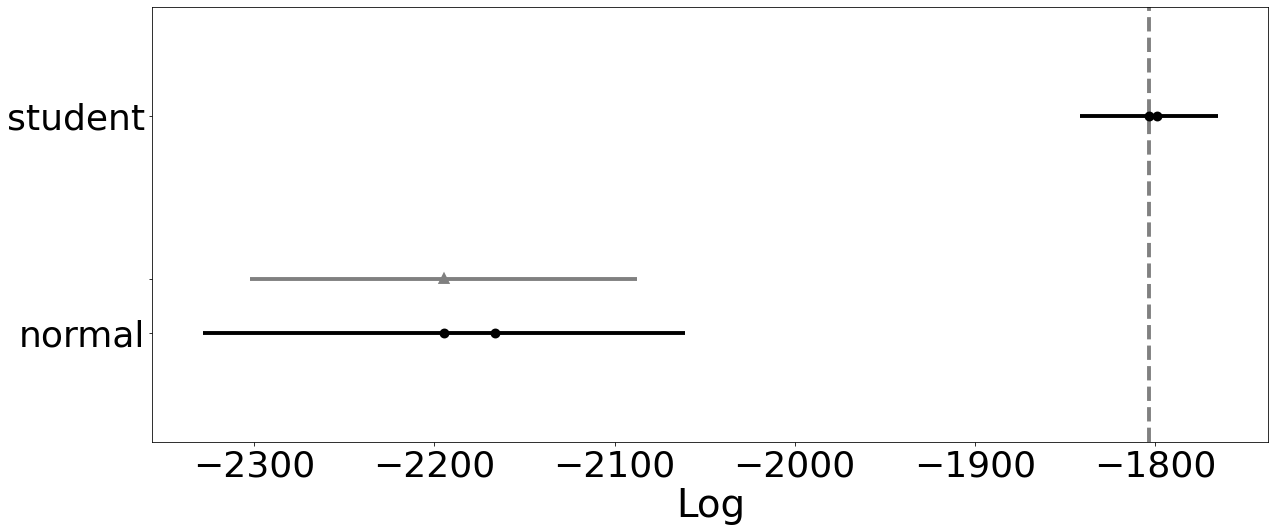

In [113]:
comparison_loo = az.compare(models_to_compare, ic='loo')
az.plot_compare(comparison_loo, figsize=(20,8))

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


<AxesSubplot:xlabel='Log'>

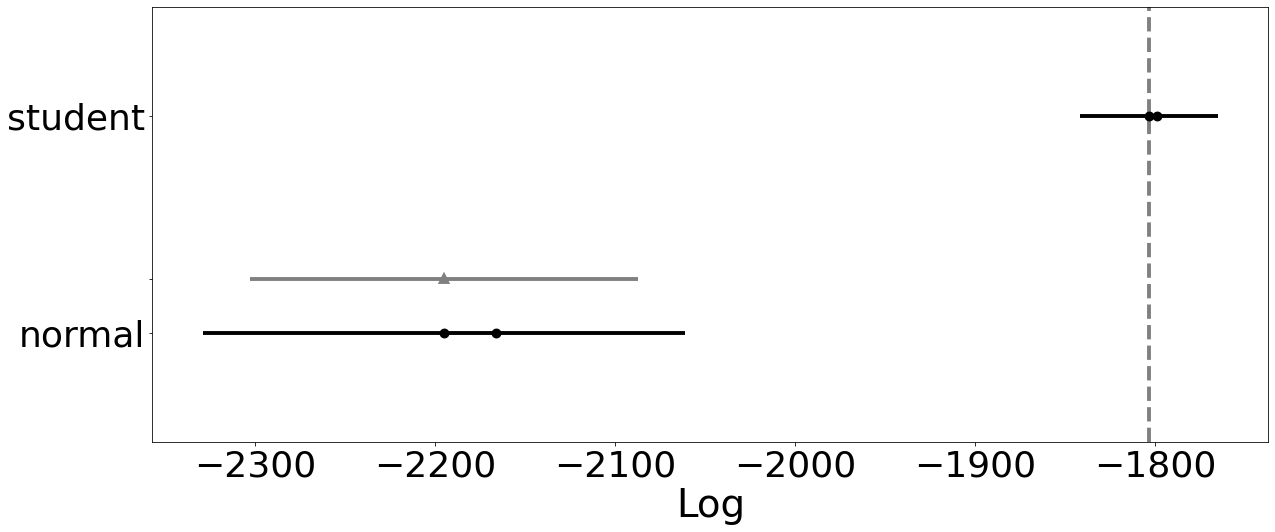

In [114]:
comparison_waic = az.compare(models_to_compare, ic='waic')
az.plot_compare(comparison_waic, figsize=(20,8))

Compare models with different number of predictors

In [115]:
model_5=CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [116]:
x_1 = x_data_2.iloc[:,:1200]
x_2 = x_data_2.iloc[:,:2400]

data=dict(N=N, K=1, y=y_data_2.to_numpy().reshape(-1), X=x_1.to_numpy().reshape(N,1))
sim_one_param=model_5.sample(data=data)

data=dict(N=N, K=2,y=y_data_2.to_numpy().reshape(-1), X=x_2.to_numpy().reshape(N,2))
sim_two_param=model_5.sample(data=data)

data=dict(N=N, K=3,y=y_data_2.to_numpy().reshape(-1),X=x_data_2.to_numpy().reshape(N,3))
sim_three_param=model_5.sample(data=data)


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)





chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)

chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)



chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)

chain 1 |██████████| 00:02 Sampling completed                       
chain 2 |██████████| 00:02 Sampling completed                       
chain 3 |██████████| 00:02 Sampling completed                       
chain 4 |██████████| 00:02 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |███████▎  | 00:01 Iteration: 1300 / 2000 [ 65%]  (Sampling)



chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)


chain 1 |█████████▌| 00:02 Iteration: 1800 / 2000 [ 90%]  (Sampling)


chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)

chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██▋       | 00:00 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |█████     | 00:00 Iteration:  900 / 2000 [ 45%]  (Warmup)



chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:02 Iteration: 1500 / 2000 [ 75%]  (Sampling)


chain 1 |█████████ | 00:02 Iteration: 1700 / 2000 [ 85%]  (Sampling)




chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:03 Sampling completed                       
chain 2 |██████████| 00:03 Sampling completed                       
chain 3 |██████████| 00:03 Sampling completed                       
chain 4 |██████████| 00:03 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [117]:
ona_param_model= az.from_cmdstanpy(posterior=sim_one_param)
two_param_model= az.from_cmdstanpy(posterior=sim_two_param)
three_param_model = az.from_cmdstanpy(posterior=sim_three_param)
models_to_compare = {"One parameter":ona_param_model,"Two parameters":two_param_model, "Three parameters":three_param_model}

<AxesSubplot:xlabel='Log'>

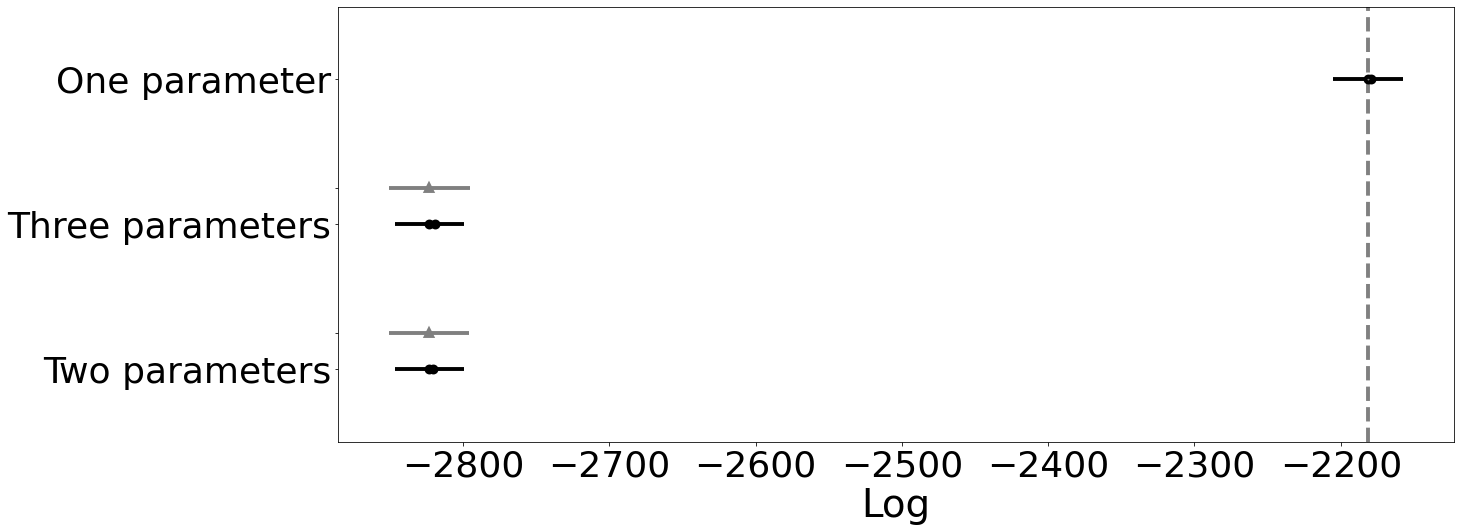

In [118]:
comparison_param_loo = az.compare(models_to_compare, ic='loo')
az.plot_compare(comparison_param_loo, figsize=(20,8))

<AxesSubplot:xlabel='Log'>

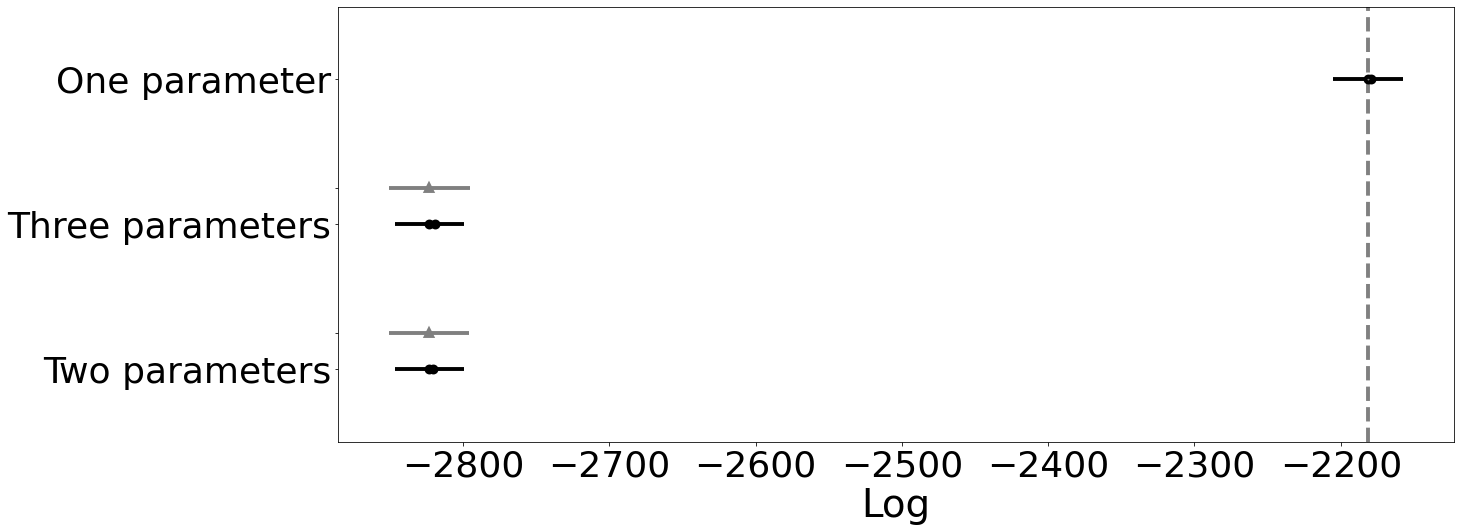

In [119]:
comparison_param_waic = az.compare(models_to_compare, ic='waic')
az.plot_compare(comparison_param_waic, figsize=(20,8))